# Simulation 1B

In this simulation we run the football example using the *direct method* with the first set of data matrices ($P_3, P_4$).

We consider the two following direct methods:
- Exploitation by rank centrality (RC) and aggregation by weighting average (WA)
- Exploitation by netflow (NF) and aggregation by weighting average (WA)

### Importing Libraries

Importing standard libraries and the following modules:
- *datagenerator.py*: containing data sources;
- *normalizationlib.py*: containing functions to perform normalizations;
- *aggregationlib.py*: containing functions to perform aggregation;
- *exploitationlib.py*: containing functions to perform exploitation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datagenerator as data
import normalizationlib as norm
import aggregationlib as agg
import exploitationlib as expl

# Football Example

We consider four team (Tunisia, Malta, Brazil, Argentina). The two experts agree that 
- Tunisia and Malta are weak teams;
- Brazil and Argentina are strong teams;
- Brazil beats Tunisia and Malta moderately;
- Argentina beats Tunisia and Malta largely;
- Brazil beats Argentina narrowly.

### Loading the data

In [2]:
P,labels = data.get_PREF_tensor_football2()
n_choices = P.shape[0]
n_experts = P.shape[2]
labels = np.array(labels)

### Normalizing data using centrality matrix

In [3]:
S = norm.centrality_tensor(P)

### Direct Approach: RC + WA (same as RC+OWA)

In [4]:
R1 = expl.RCT_3D(S)
r1 = agg.WA_2D(R1)

### Direct Approach: NF + WA (same as NF+OWA)

In [5]:
R3 = expl.NFT_3D(S)
r3 = agg.WA_2D(R3)

### Printing the intermediate rankings of each expert

In [6]:
print('RC ranking')
for i in range(R1.shape[1]):
    print('Expert {0}: {1}'.format(i,labels[np.argsort(R1[:,i])[::-1]]))

print('\n')
print('NF ranking')
for i in range(R3.shape[1]):
    print('Expert {0}: {1}'.format(i,labels[np.argsort(R3[:,i])[::-1]]))

RC ranking
Expert 0: ['Argentina' 'Brazil' 'Tunisia' 'Malta']
Expert 1: ['Brazil' 'Argentina' 'Malta' 'Tunisia']


NF ranking
Expert 0: ['Argentina' 'Brazil' 'Tunisia' 'Malta']
Expert 1: ['Argentina' 'Brazil' 'Tunisia' 'Malta']


### Printing the final consesus ranking

RC+WA ranking: ['Brazil' 'Argentina' 'Tunisia' 'Malta']
NF+WA ranking: ['Argentina' 'Brazil' 'Tunisia' 'Malta']


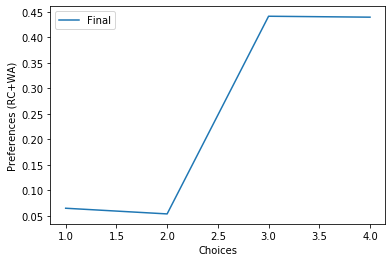

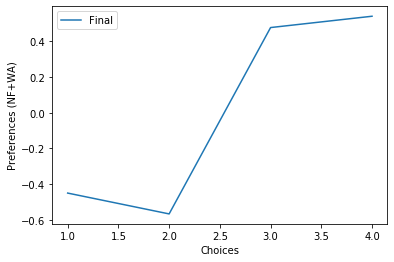

In [7]:
print('RC+WA ranking: {0}'.format(labels[np.argsort(r1)[::-1]]))

plt.plot(np.arange(n_choices)+1,r1,label='Final')
plt.xlabel('Choices')
plt.ylabel('Preferences (RC+WA)')
plt.legend()

print('NF+WA ranking: {0}'.format(labels[np.argsort(r3)[::-1]]))

plt.figure()
plt.plot(np.arange(n_choices)+1,r3,label='Final')
plt.xlabel('Choices')
plt.ylabel('Preferences (NF+WA)')
plt.legend()